In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Initial
K = 3
labels = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
colors = np.random.rand(len(labels), 3)

In [3]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("Wholesale customers data.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [4]:
# Display a description of the dataset
stats = data.describe()
print(stats)

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


In [5]:
# Process data
# ....
data = data.values

fresh = 60000
milk = 35000
grocery = 40000
frozen = 20000
detergents = 20000
delicassen = 20000

checker = (data[:, 0] < fresh) *\
    (data[:, 1] < milk) *\
    (data[:, 2] < grocery) *\
    (data[:, 3] < frozen) *\
    (data[:, 4] < detergents) *\
    (data[:, 5] < delicassen)

data = data[checker]

In [6]:
# Clustering
clusterer = KMeans(n_clusters=K).fit(data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

print(centers)

[[ 4979.84146341 11909.18292683 18751.98780488  1632.13414634
   8283.58536585  1810.17073171]
 [ 6798.54320988  3252.41975309  4081.79835391  2431.73251029
   1209.14403292  1000.88065844]
 [26735.76470588  3994.56862745  5098.99019608  4256.34313725
   1061.59803922  1761.57843137]]


In [7]:
def visualize_centroids(data, clusters, centroids, K):
    centroids = np.array(centroids)
    fig, ax = plt.subplots()
    ind = np.arange(K)*3  # the x locations for the groups
    width = 0.35       # the width of the bars

    # compute standard deviation of features
    std = []
    for i in range(K):
        std.append( np.std(data[clusters[i]], axis = 0) )
    std = np.array(std)
        
    # draw
    for i in range(centroids.shape[1]):
        ax.bar(ind + i*width, centroids[:, i], width, color=colors[i, :], yerr=std[:, i])


    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['cluster ' + str(i) for i in range(K)])
    ax.legend(labels)

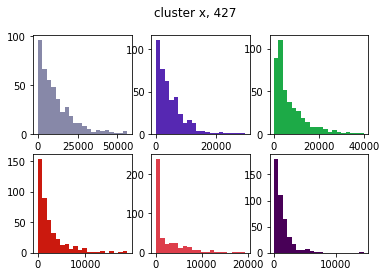

In [8]:
def visualize_density(data, index):
    data = np.array(data)
    plt.figure()
    plt.suptitle('cluster ' + str(index) + ', ' + str(data.shape[0]))
    for i in range(data.shape[1]):
        plt.subplot(2, 3, i + 1)
        plt.hist(x =data[:, i], bins=20, color=colors[i, :])

visualize_density(data, 'x')

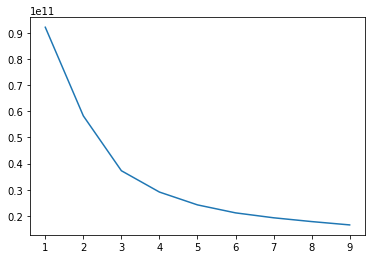

In [9]:
def draw_elbow(data):
    elb = {}
    for i in range(1, 10):
        clusterer = KMeans(n_clusters=i).fit(data)
        elb[i] = clusterer.inertia_
    plt.figure()
    plt.plot(list(elb.keys()), list(elb.values()))

draw_elbow(data)

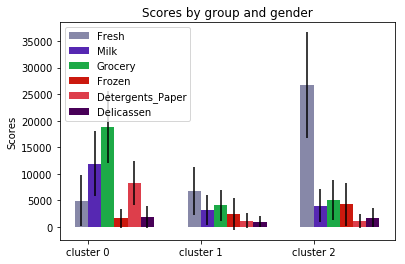

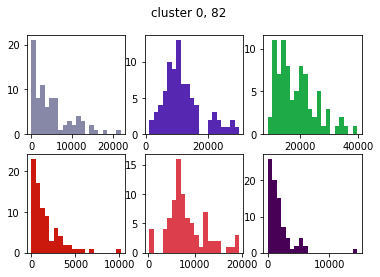

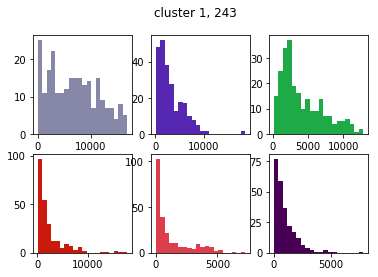

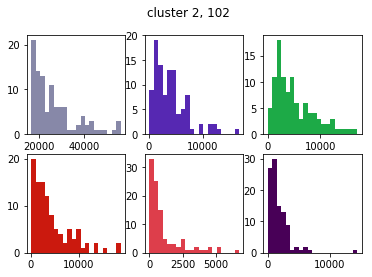

In [10]:
# Visualize centroids
clusters = [np.where(clusterer.labels_ == i)[0] for i in range(clusterer.n_clusters)]

visualize_centroids(data, clusters, centers, K)

# Visualize density of features
for i in range(K):
    visualize_density(data[clusters[i]], i)

plt.show()